# Convolutional Neural Networks para Classificação de Imagens 

Utilizando o Conjunto de Dados [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html)

Iniciamos importando as bibliotecas básicas necessárias

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
from tensorflow.keras.datasets import cifar10

#### Separamos os dados de Treinamento e Teste

In [4]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

#### Obtemos o formato de nossos dados

50.000 imagens de 32x32 pixels com 3 canais de cores (Red, Green, Blue)

In [5]:
x_train.shape

(50000, 32, 32, 3)

Obtemos o formato de uma Matriz que representa uma única imagem

In [6]:
x_train[12].shape

(32, 32, 3)

Apresentamos ela com a função **imshow()** da biblioteca Matplotlib

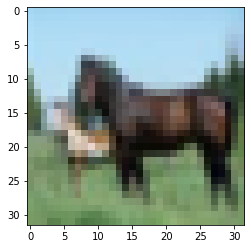

In [7]:
plt.imshow(x_train[12])

Imprimimos o valor máximo e mínimo encontrados na Matriz

In [8]:
print(x_train[12].max(), x_train[12].min())

251 2


Performamos o Scaling dos Dados

In [9]:
x_train = x_train / 255
x_test = x_test / 255

In [10]:
from tensorflow.keras.utils import to_categorical

Transformamos nosso Target(y) em Categórico

In [11]:
y_categorical_train = to_categorical(y_train, 10)
y_categorical_test = to_categorical(y_test, 10)

Imprimimos o valor do Target de índice 12, que nos retorna o número 7 que representa um Cavalo

In [12]:
y_train[12]

array([7], dtype=uint8)

#### Construímos o Modelo

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [14]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))

# Output Layer
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

#### Treinamos o Modelo

Observe que estamos utilizando **EarlyStopping**

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [18]:
model.fit(x_train, y_categorical_train, epochs=15, validation_data=(x_test, y_categorical_test), callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 80s 52ms/step - loss: 1.5062 - accuracy: 0.4568 - val_loss: 1.2931 - val_accuracy: 0.5403
Epoch 2/15
1563/1563 [==============================] - 54s 34ms/step - loss: 1.1943 - accuracy: 0.5763 - val_loss: 1.1159 - val_accuracy: 0.6050
Epoch 3/15
1563/1563 [==============================] - 54s 34ms/step - loss: 1.0531 - accuracy: 0.6290 - val_loss: 1.0840 - val_accuracy: 0.6173
Epoch 4/15
1563/1563 [==============================] - 53s 34ms/step - loss: 0.9521 - accuracy: 0.6669 - val_loss: 1.0299 - val_accuracy: 0.6423
Epoch 5/15
1563/1563 [==============================] - 54s 34ms/step - loss: 0.8642 - accuracy: 0.6974 - val_loss: 1.0061 - val_accuracy: 0.6559
Epoch 6/15
1563/1563 [==============================] - 54s 35ms/step - loss: 0.7921 - accuracy: 0.7247 - val_loss: 1.0347 - val_accuracy: 0.6511
Epoch 7/15
1563/1563 [==============================] - 54s 35ms/step - loss: 0.7207 - accuracy: 0.7457 - val_loss: 1.0234 -

#### Observamos o Desempenho do Modelo através de diversas Métricas

In [19]:
metrics = pd.DataFrame(model.history.history)

In [20]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.506200,0.45676,1.293124,0.5403
1,1.194345,0.57634,1.115909,0.6050
2,1.053087,0.62896,1.083996,0.6173
3,0.952130,0.66688,1.029860,0.6423
4,0.864193,0.69738,1.006100,0.6559
5,0.792076,0.72472,1.034717,0.6511
6,0.720729,0.74572,1.023369,0.6586


In [21]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

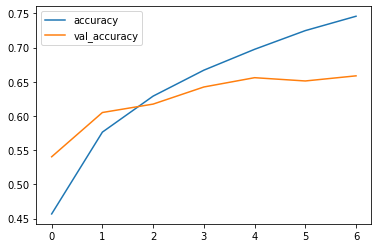

In [22]:
metrics[['accuracy', 'val_accuracy']].plot()

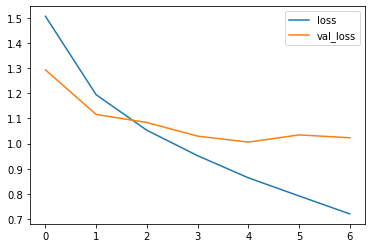

In [23]:
metrics[['loss', 'val_loss']].plot()

In [24]:
model.evaluate(x_test, y_categorical_test, verbose=0)

[1.0233690738677979, 0.6585999727249146]

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
predictions = model.predict_classes(x_test)

In [28]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70      1000
           1       0.75      0.79      0.77      1000
           2       0.67      0.48      0.56      1000
           3       0.49      0.48      0.48      1000
           4       0.68      0.55      0.61      1000
           5       0.61      0.49      0.54      1000
           6       0.73      0.78      0.75      1000
           7       0.79      0.67      0.72      1000
           8       0.73      0.78      0.75      1000
           9       0.54      0.87      0.66      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.65     10000
weighted avg       0.67      0.66      0.65     10000



In [29]:
confusion_matrix(y_test, predictions)

array([[722,  44,  21,   9,   8,   6,   6,   4,  92,  88],
       [ 21, 786,   0,   3,   1,   3,   5,   0,  26, 155],
       [ 96,  21, 479,  72,  83,  54,  88,  20,  27,  60],
       [ 32,  35,  49, 476,  44, 137,  74,  29,  41,  83],
       [ 34,  16,  63,  77, 549,  40,  70,  76,  32,  43],
       [ 27,  12,  49, 218,  41, 486,  37,  43,  22,  65],
       [ 11,  15,  29,  48,  23,  16, 776,   6,  16,  60],
       [ 27,  16,  16,  45,  58,  49,   5, 667,   9, 108],
       [ 68,  44,   7,   9,   4,   7,   2,   1, 779,  79],
       [ 15,  62,   6,   6,   2,   4,   7,   2,  30, 866]])

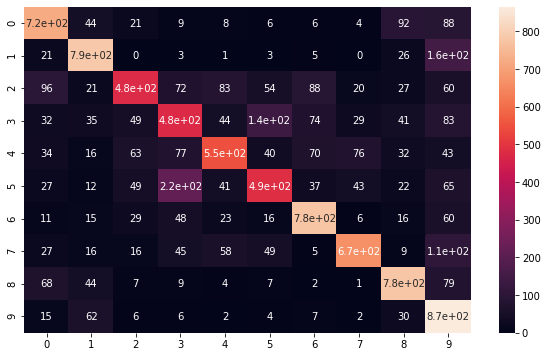

In [31]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions),annot=True)

#### Testamos o Modelo e sua capacidade Preditiva

In [48]:
image = x_test[20]

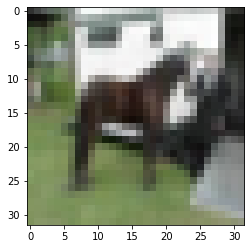

In [49]:
plt.imshow(image)

In [50]:
model.predict_classes(image.reshape(1,32,32,3))

array([7])

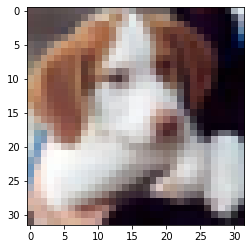

In [51]:
img = x_test[16]
plt.imshow(img)

In [52]:
model.predict_classes(img.reshape(1,32,32,3))

array([5])